# Seattle Airbnb Data Analysis

## Three essential business problems of interests

    What Day Should You Book Your Visit to Seattle? 
    
How do the costs of staying in Seattle shift throughout the week? This question dives into the fluctuating Airbnb prices by day, aiming to pinpoint when demand spikes. Focusing on pricing strategies against visitor influx, this analysis reveals the city's peak tourism times. Understanding these patterns benefits travelers seeking the best deals and hosts optimising for peak demand.

    When Does Seattle Truly Come Alive?
    
Is there a best season to explore the Emerald City? By scrutinizing Airbnb property availability, we're set to uncover Seattle's high and low seasons. This inquiry into seasonal availability patterns will highlight the times when finding a place to stay might be a breeze—or a challenge. Insights from this exploration could guide tourists planning their visits during less crowded periods and aid hosts in preparing their listings for the busiest times. 

    Choosing Your Seattle Stay: Property and Room Types? 
    
Discover how property and room types affect availability. This brief analysis dives into the Airbnb market, uncovering the cost differences and prevalence of each option to help you make an informed decision for your trip.

## Step 0: Prepare the data

### Step 0.1: Load the packages

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 0.2: Import the source datasets

In [2]:
# Load in the airbnb seattle datasets
df_Sea_calendar = pd.read_csv('/Users/kobe/Desktop/DS_Nanodegree/Project_1/datasets/Sea_calendar.csv',sep=",")
df_Sea_listings = pd.read_csv('/Users/kobe/Desktop/DS_Nanodegree/Project_1/datasets/Sea_listings.csv', sep=",")
df_Sea_reviews = pd.read_csv('/Users/kobe/Desktop/DS_Nanodegree/Project_1/datasets/Sea_reviews.csv', sep=",")
df_Sea_calendar.head(5)


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


## Step 1: EDA

In [3]:
# display the shape of the datasets
print(f"The shapes of the Seattle Airbnb datasets are: ")
print(f"Calendar:", df_Sea_calendar.shape, 
      "; Listings:", df_Sea_listings.shape, 
      "; Reviews:", df_Sea_reviews.shape)

The shapes of the Seattle Airbnb datasets are: 
Calendar: (1308890, 4) ; Listings: (3585, 95) ; Reviews: (68275, 6)


### Merge the datasets

In [4]:
# Merge df_calendar and df_listings
merged_Sea_df = pd.merge(df_Sea_calendar, df_Sea_reviews, 
                         on=['listing_id', 'date'], how = 'left')

# Merge again with df_reviews
merged_Sea_df = pd.merge(merged_Sea_df, df_Sea_listings, 
                         left_on='listing_id', right_on='id', how = 'left')

print(merged_Sea_df.shape)
display(merged_Sea_df.sample(5))

(1308892, 103)


,listing_id,date,available,price_x,id_x,reviewer_id,reviewer_name,comments,id_y,listing_url,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
260382,7036112,2017-04-21,f,NaN,NaN,NaN,NaN,NaN,7036112,https://www.airbnb.com/rooms/7036112,...,9.0,f,NaN,NaN,f,strict,f,f,1,1.02
329614,5146447,2017-06-21,t,$63.00,NaN,NaN,NaN,NaN,5146447,https://www.airbnb.com/rooms/5146447,...,8.0,f,NaN,NaN,t,moderate,f,f,6,2.49
1054590,7693354,2017-05-24,t,$82.00,NaN,NaN,NaN,NaN,7693354,https://www.airbnb.com/rooms/7693354,...,9.0,f,NaN,NaN,t,moderate,f,f,1,8.86
270411,11229070,2017-05-15,f,NaN,NaN,NaN,NaN,NaN,11229070,https://www.airbnb.com/rooms/11229070,...,10.0,f,NaN,NaN,f,moderate,f,f,2,4.87
1091814,12175961,2017-04-03,t,$35.00,NaN,NaN,NaN,NaN,12175961,https://www.airbnb.com/rooms/12175961,...,6.0,f,NaN,NaN,f,moderate,f,f,20,0.25


In [5]:
print(sum(merged_Sea_df['listing_id'] != merged_Sea_df['id_y']))

# The listing_id from df_Sea_calendar and id from df_Sea_listings are identical to each other row by row, 
# so consider to remove the duplicated column

merged_Sea_df_v1 = merged_Sea_df.drop('id_y', axis=1)
print(merged_Sea_df_v1.shape)


0
(1308892, 102)


In [6]:
# The dataset contains two columns, so try to rename to distinguish the two
merged_Sea_df_v2 = merged_Sea_df_v1.rename(columns={'price_x': 'calendar_price', 'price_y': 'listing_price'})

print(merged_Sea_df_v2.shape)
display(merged_Sea_df_v2.head())

(1308892, 102)


,listing_id,date,available,calendar_price,id_x,reviewer_id,reviewer_name,comments,listing_url,scrape_id,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,2017-09-05,f,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/12147973,20160906204935,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,12147973,2017-09-04,f,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/12147973,20160906204935,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
2,12147973,2017-09-03,f,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/12147973,20160906204935,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
3,12147973,2017-09-02,f,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/12147973,20160906204935,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
4,12147973,2017-09-01,f,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/12147973,20160906204935,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


### Explore the datasets

In [7]:
# Identify missing values
print(merged_Sea_df_v2.isnull().sum())
# Drop missing rows
merged_Sea_df_v3 = merged_Sea_df_v2.dropna(how='all')
print(merged_Sea_df_v3.shape == merged_Sea_df_v2.shape)

listing_id                                0
date                                      0
available                                 0
calendar_price                       665855
id_x                                1308826
                                     ...   
cancellation_policy                       0
require_guest_profile_picture             0
require_guest_phone_verification          0
calculated_host_listings_count            0
reviews_per_month                    276305
Length: 102, dtype: int64
True


In [8]:
# Identify Duplicate Rows
merged_Sea_df_v3[merged_Sea_df_v3.duplicated(keep=False)]
# Drop Duplicate Rows
merged_Sea_df_v4 = merged_Sea_df_v3.drop_duplicates()
print(merged_Sea_df_v4.shape)

(1308527, 102)


In [9]:
merged_Sea_df_v4.dtypes

listing_id                            int64
date                                 object
available                            object
calendar_price                       object
id_x                                float64
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 102, dtype: object

In [10]:
# Convert 'date' to datetime format since it's not already
merged_Sea_df_v5 = merged_Sea_df_v4.copy()
merged_Sea_df_v5['date'] = pd.to_datetime(merged_Sea_df_v5['date']) 

### Clean the datasets

In [11]:
print(df_Sea_calendar.columns)
print(df_Sea_listings.columns)
print(df_Sea_reviews.columns)

Index(['listing_id', 'date', 'available', 'price'], dtype='object')
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact

In [12]:
print(list(merged_Sea_df_v5.columns))

['listing_id', 'date', 'available', 'calendar_price', 'id_x', 'reviewer_id', 'reviewer_name', 'comments', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bed

In [13]:
# Only keep columns that are relevant to our focused problems
columns_to_keep = ['listing_id', 'date', 'available', 'calendar_price', 'listing_price', 
                    'property_type', 'room_type']

# Drop unnecessary columns from Seattle DataFrames
merged_Sea_df_v6 = merged_Sea_df_v5[columns_to_keep]
merged_Sea_df_v6.sample(5)

,listing_id,date,available,calendar_price,listing_price,property_type,room_type
357502,7205210,2017-03-10,t,$105.00,$200.00,Apartment,Entire home/apt
655844,4602191,2016-10-24,t,$395.00,$395.00,Apartment,Entire home/apt
54008,10253591,2016-09-17,f,NaN,$105.00,House,Private room
1236654,8301150,2017-08-03,f,NaN,$175.00,Apartment,Entire home/apt
614723,10945407,2017-05-31,f,NaN,$230.00,Apartment,Entire home/apt


In [14]:
# Ensure 'price' column is in a consistent numeric format
merged_Sea_df_v7 = merged_Sea_df_v6.copy()

# Now you can safely modify the DataFrame
merged_Sea_df_v7['calendar_price'] = merged_Sea_df_v7['calendar_price'].replace('[\$,]', '', regex=True).astype(float)
merged_Sea_df_v7['listing_price'] = merged_Sea_df_v7['listing_price'].replace('[\$,]', '', regex=True).astype(float)

## Step 2: Problem Deep Dives

### Problem 1: What Day Should You Book Your Visit to Seattle? 

    How do the costs of staying in Seattle shift throughout the week? This question dives into the fluctuating Airbnb prices by day, aiming to pinpoint when demand spikes. Focusing on pricing strategies against visitor influx, this analysis reveals the city's peak tourism times. Understanding these patterns benefits travelers seeking the best deals and hosts optimising for peak demand.

In [15]:
df_p1_v1 = merged_Sea_df_v7.copy()

# Add a new column 'day_of_week' to identify the month and day of each row
df_p1_v1['day_of_week'] = df_p1_v1['date'].dt.day_name()

display(df_p1_v1.sample(5))

,listing_id,date,available,calendar_price,listing_price,property_type,room_type,day_of_week
862657,8428314,2017-03-28,f,NaN,225.0,Apartment,Entire home/apt,Tuesday
1187640,7475557,2016-11-15,t,271.0,325.0,Apartment,Entire home/apt,Tuesday
1214534,8552338,2016-12-16,f,NaN,50.0,House,Private room,Friday
1208575,2930663,2017-07-08,t,85.0,75.0,House,Private room,Saturday
654292,8814039,2016-12-19,t,283.0,168.0,Apartment,Entire home/apt,Monday


In [16]:
# Clean the dataset
df_p1_v2 = df_p1_v1.drop(['property_type', 'room_type'], axis=1)
df_p1_v2 = df_p1_v2[df_p1_v2.available == 't'] # keep only the entries with available == t

display(df_p1_v2.sample(5))

,listing_id,date,available,calendar_price,listing_price,day_of_week
300212,4205641,2017-03-07,t,113.0,100.0,Tuesday
1306351,14536322,2017-05-10,t,85.0,85.0,Wednesday
927311,6646604,2017-01-20,t,135.0,125.0,Friday
1148737,14842237,2017-06-16,t,237.0,225.0,Friday
939343,2729015,2017-08-17,t,85.0,85.0,Thursday


In [17]:
# Find the distribution of availability on different days across a week
df_p1_v2['day_of_week'].value_counts()

Tuesday      93320
Monday       92402
Sunday       92196
Wednesday    91805
Thursday     91191
Saturday     91056
Friday       90987
Name: day_of_week, dtype: int64

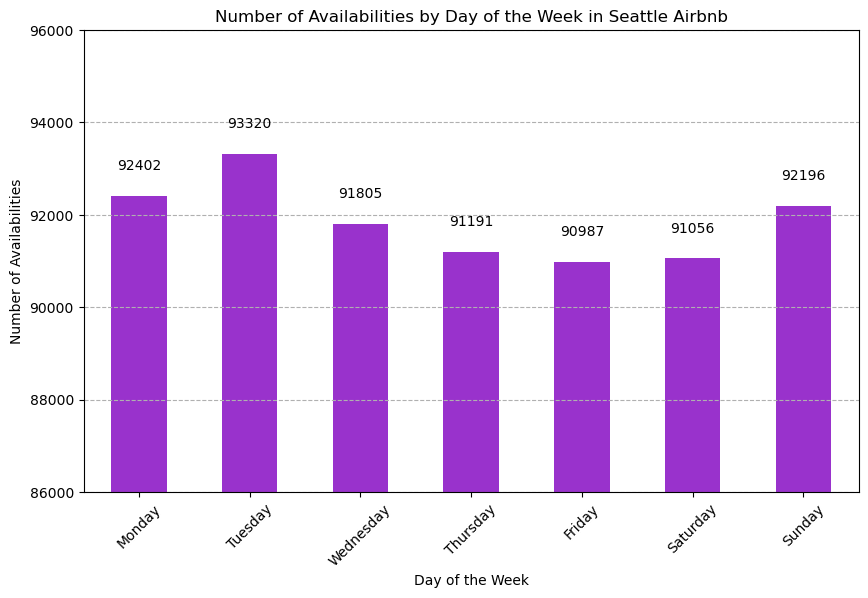

In [18]:
# Create an ordered Categorical type (ensures the days of the week are in the correct order)
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_p1_v2['day_of_week'] = pd.Categorical(df_p1_v2['day_of_week'], categories=days_order, ordered=True)

# Now, when you calculate value_counts, the result will be in the order of the days of the week
availability_counts = df_p1_v2['day_of_week'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
bars = availability_counts.plot(kind='bar', color='#9932CC')
plt.title('Number of Availabilities by Day of the Week in Seattle Airbnb')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Availabilities')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.ylim(86000, 96000) # set y-axis limits
# Adding the count above each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 500, f'{int(bar.get_height())}', 
             ha='center', va='bottom')
plt.show()

In [19]:
df_p1_v2.groupby('day_of_week')[['calendar_price', 'listing_price']].mean().reset_index()

,day_of_week,calendar_price,listing_price
0,Monday,195.806682,178.089067
1,Tuesday,195.170649,178.070907
2,Wednesday,195.415282,178.202767
3,Thursday,198.070467,178.194120
4,Friday,203.119127,178.376581
5,Saturday,203.406201,178.365105
6,Sunday,198.216929,178.374051


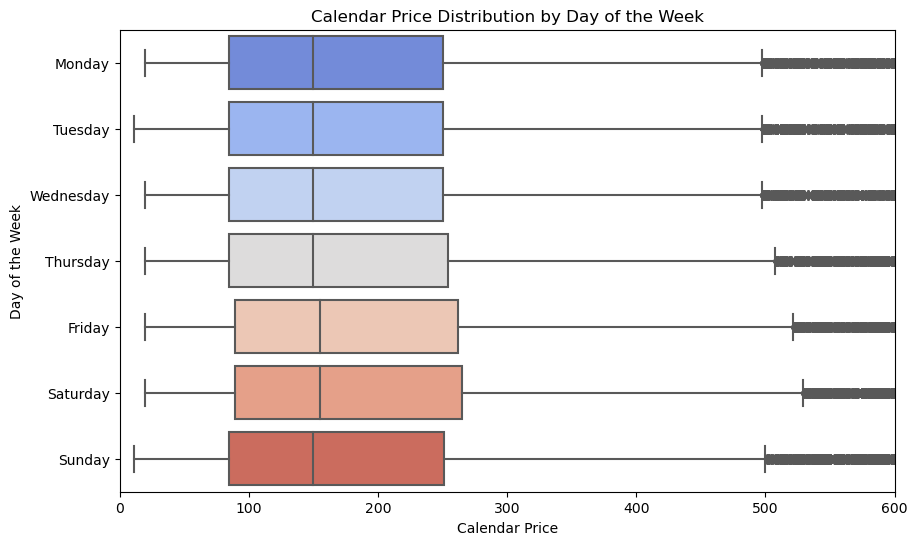

In [20]:
# Creating the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y='day_of_week', x='calendar_price', data=df_p1_v2, palette="coolwarm", orient='h')
plt.title('Calendar Price Distribution by Day of the Week')
plt.ylabel('Day of the Week')
plt.xlabel('Calendar Price')
plt.xlim(0, 600)
plt.show()

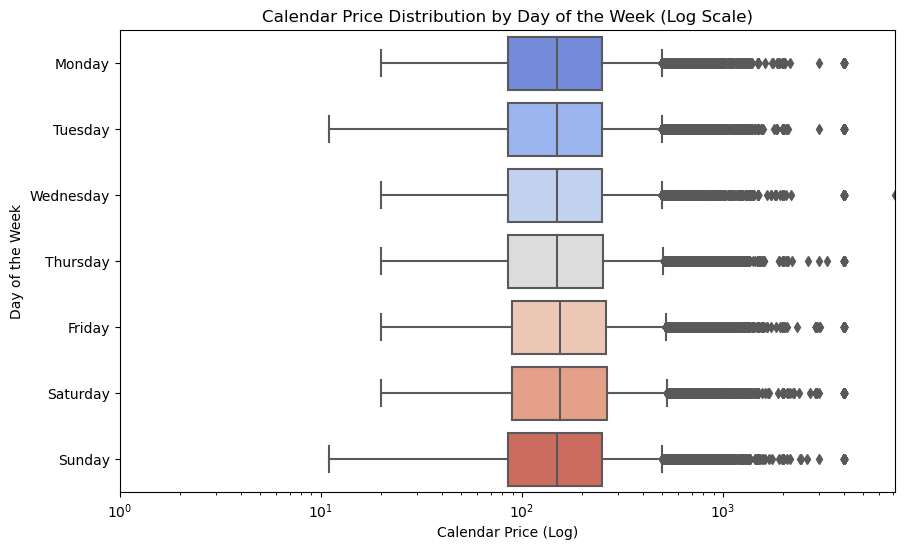

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='day_of_week', x='calendar_price', data=df_p1_v2, palette="coolwarm", orient='h')
plt.xscale('log')  # Applying logarithmic scale
plt.title('Calendar Price Distribution by Day of the Week (Log Scale)')
plt.xlabel('Calendar Price (Log)')
plt.ylabel('Day of the Week')
plt.xlim(1, df_p1_v2['calendar_price'].max())  
plt.show()

### Problem 2: When Does Seattle Truly Come Alive?
    Is there a best season to explore the Emerald City? By scrutinising Airbnb property availability, we're set to uncover Seattle's high and low seasons. This inquiry into seasonal availability patterns will highlight the times when finding a place to stay might be a breeze—or a challenge. Insights from this exploration could guide tourists planning their visits during less crowded periods and aid hosts in preparing their listings for the busiest times. 

In [22]:
df_p2_v1 = merged_Sea_df_v7.copy()

# Add a new column 'day_of_week' to identify the month and day of each row
df_p2_v1['month'] = df_p2_v1['date'].dt.month_name().str.slice(0, 3)

display(df_p2_v1.sample(5))

,listing_id,date,available,calendar_price,listing_price,property_type,room_type,month
71957,8908145,2017-07-15,t,170.0,170.0,House,Private room,Jul
394575,6758482,2017-08-26,t,150.0,150.0,Apartment,Entire home/apt,Aug
656112,7596262,2017-02-11,t,228.0,169.0,Apartment,Entire home/apt,Feb
256758,4089940,2017-03-17,f,NaN,249.0,Apartment,Entire home/apt,Mar
778000,6936712,2017-01-07,f,NaN,175.0,Condominium,Entire home/apt,Jan


In [23]:
# Clean the dataset
df_p2_v2 = df_p2_v1.drop(['property_type', 'room_type'], axis=1)
df_p2_v2 = df_p2_v2[df_p2_v2.available == 't'] # keep only the entries with available == t

display(df_p2_v2.sample(5))

,listing_id,date,available,calendar_price,listing_price,month
968600,1327725,2016-11-09,t,136.0,147.0,Nov
124064,8981656,2017-07-23,t,85.0,85.0,Jul
1073059,13313124,2016-10-17,t,70.0,80.0,Oct
168495,9626892,2016-11-22,t,71.0,72.0,Nov
1069902,14127153,2017-05-09,t,31.0,31.0,May


In [24]:
# Find the distribution of availability on different month across a week
df_p2_v2['month'].value_counts()

Jan    63181
Dec    60993
Nov    58858
Feb    56810
Aug    55561
Mar    55181
Jul    54963
May    53600
Jun    52731
Apr    51382
Oct    46314
Sep    33383
Name: month, dtype: int64

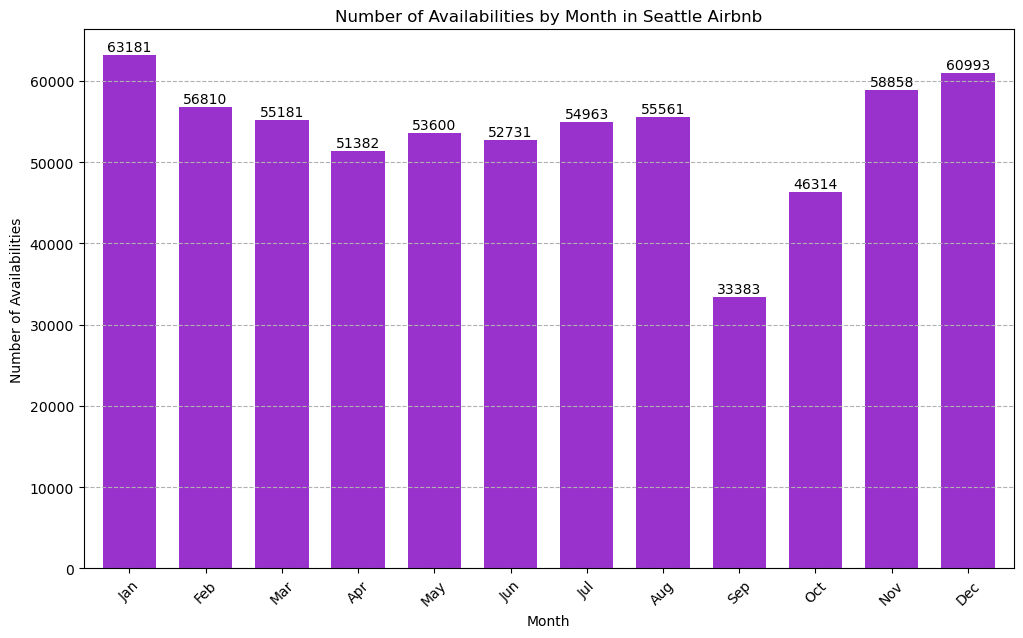

In [25]:
# Create an ordered Categorical type (ensures the months of a year are in the correct order)
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_p2_v2['month'] = pd.Categorical(df_p2_v2['month'], categories=months_order, ordered=True)


# Now, when you calculate value_counts, the result will be in the order of the days of the week
availability_counts = df_p2_v2['month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 7))
bars = availability_counts.plot(kind='bar', color='#9932CC', width=0.7)
plt.title('Number of Availabilities by Month in Seattle Airbnb')
plt.xlabel('Month')
plt.ylabel('Number of Availabilities')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
# plt.ylim(86000, 96000) # set y-axis limits
# Adding the count above each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, f'{int(bar.get_height())}', 
             ha='center', va='bottom')
plt.show()

Insights: 

- In Seattle, it's much harder to find available properties on Airbnb in September and October. While after that, between November and January, the largest number of properties are left available. Tourists who choose to visit Seattle during this time could enjoy a wider selection of accomodations. At the same time, hosts could choose to refurbish or do the maintainance on their properties during this time because of the competitive market. 

### Problem 3: Choosing Your Seattle Stay: Property and Room Types? 
    Discover how property and room types affect availability. This brief analysis dives into the Airbnb market, uncovering the cost differences and prevalence of each option to help you make an informed decision for your trip.

In [26]:
df_p3_v1 = merged_Sea_df_v7.copy()

# Clean the dataset
df_p3_v1 = df_p3_v1.drop(['calendar_price', 'listing_price'], axis=1)
df_p3_v1 = df_p3_v1[df_p3_v1.available == 't'] # keep only the entries with available == t

display(df_p3_v1.head())

,listing_id,date,available,property_type,room_type
365,3075044,2017-08-22,t,Apartment,Private room
366,3075044,2017-08-21,t,Apartment,Private room
367,3075044,2017-08-20,t,Apartment,Private room
368,3075044,2017-08-19,t,Apartment,Private room
369,3075044,2017-08-18,t,Apartment,Private room


In [27]:
# Find the distribution of availability on different property types
property_type_counts = df_p3_v1['property_type'].value_counts()
display(property_type_counts)

Apartment          452270
House              122934
Condominium         33430
Bed & Breakfast     10914
Townhouse            8162
Loft                 5395
Other                4249
Boat                 3677
Entire Floor          829
Camper/RV             339
Villa                 335
Guesthouse            159
Dorm                  116
Name: property_type, dtype: int64

In [28]:
# Find the distribution of availability on different room types
room_type_counts = df_p3_v1['room_type'].value_counts()
display(room_type_counts)

Entire home/apt    374910
Private room       251331
Shared room         16716
Name: room_type, dtype: int64

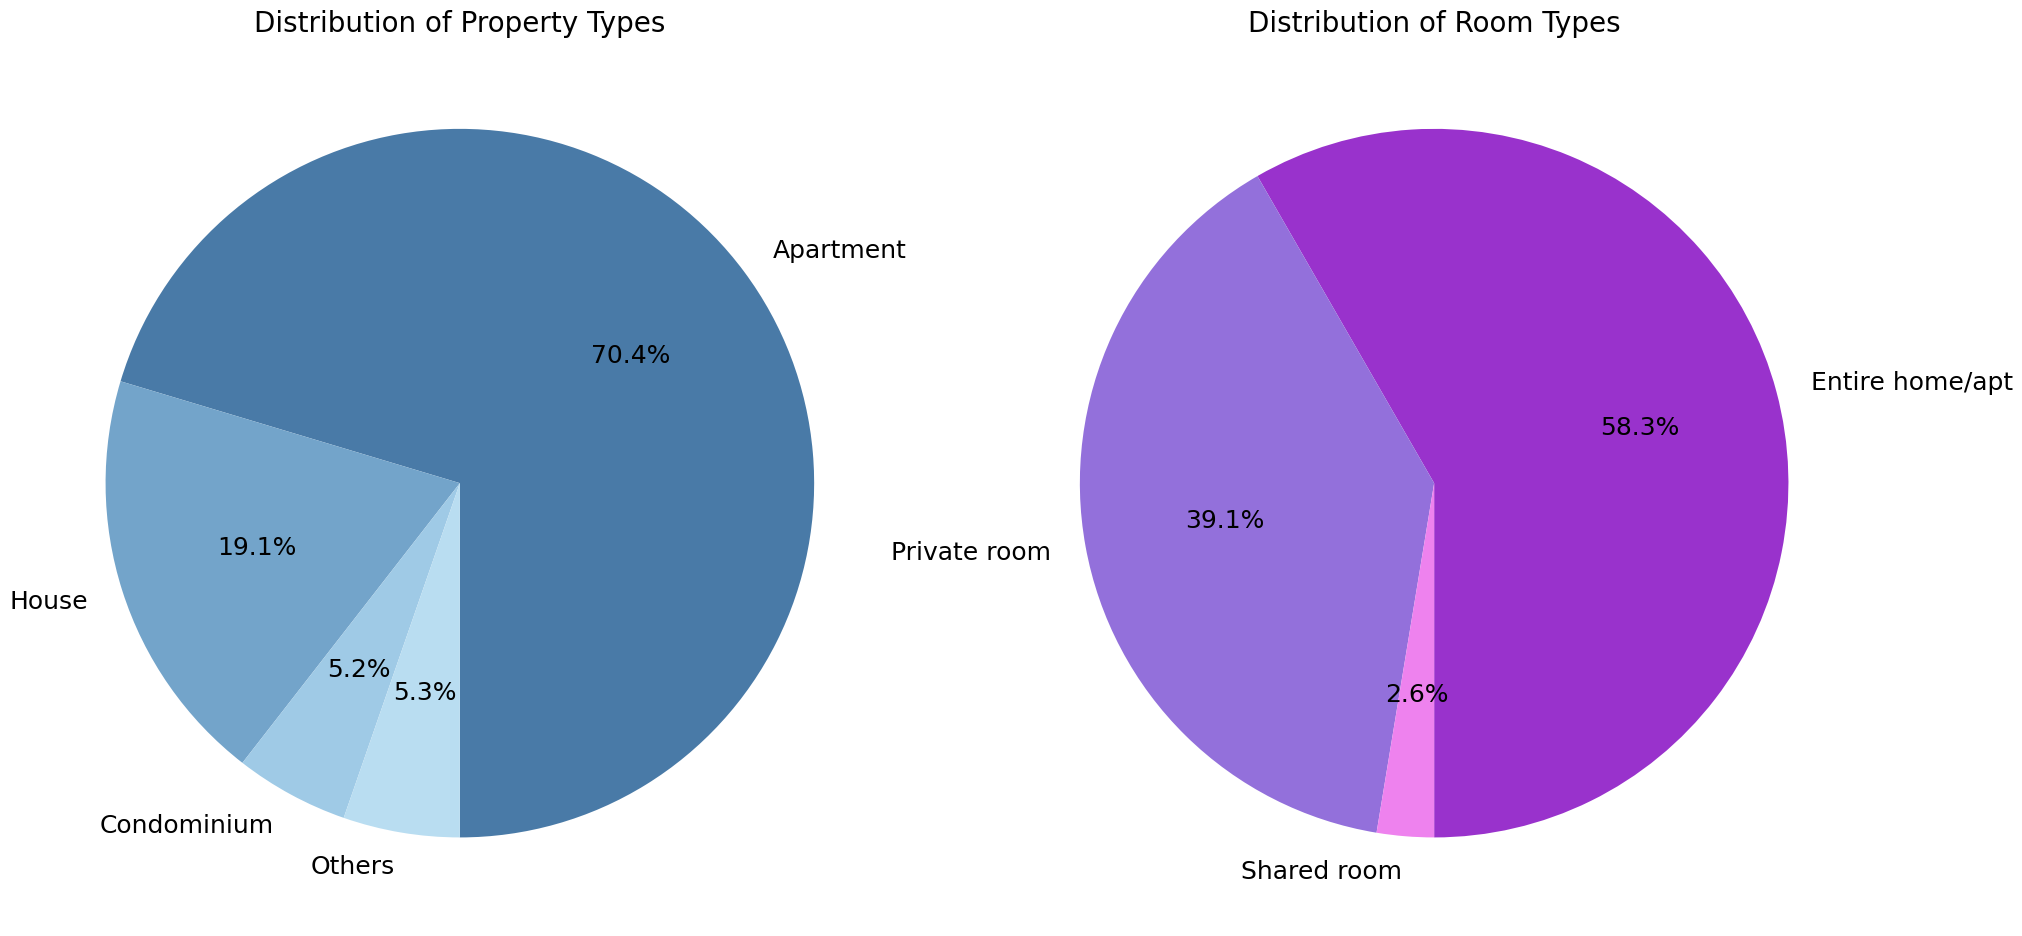

In [29]:
# Setup for subplots to visualise the property and room types distributions
fig, axs = plt.subplots(1, 2, figsize=(24, 12))

property_colors = ["#497AA7", "#73A4CA", "#9FCAE6", "#B9DDF1"]  # Darker blues, 4 categories
room_colors = ["#9932CC", "#9370DB", "#EE82EE"]

# Combine categories with counts less than 2% into "Others"
threshold = 0.02 * property_type_counts.sum()
property_type_counts_adjusted = property_type_counts[property_type_counts >= threshold]
property_type_counts_adjusted['Others'] = property_type_counts[property_type_counts < threshold].sum()

# Pie chart for the distribution of property types on the left
axs[0].pie(property_type_counts_adjusted, labels=property_type_counts_adjusted.index, autopct='%1.1f%%', 
           startangle=270, textprops={'fontsize': 18}, colors=property_colors)
axs[0].set_title('Distribution of Property Types', fontsize=20)

# Pie chart for the distribution of room types on the right
axs[1].pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', 
           startangle=270, textprops={'fontsize': 18}, colors=room_colors)
axs[1].set_title('Distribution of Room Types', fontsize=20)

plt.subplots_adjust(wspace=0.1)
plt.show()

Insights: 

- Apartment (70%) is the most common type of properties, by far exceeding others. House and Condominium follow behind. Beyond these, there's a diversity in property types, including bed and breakfasts, townhouses, lofts, etc, enabling satisfying a wide range of preferences and needs among guests. 
    
- The majority of listings are for entire homes or apartments (58%), suggesting a strong demand for privacy and full-property access among travelers. Private rooms constitute another significant portion, indicating a considerable market for affordable accommodations, possibly appealing to solo travelers or those seeking a more home-like environment. It could represent a balance between privacy and affordability. Shared Room is the least common type. 

In [30]:
df_p3_v2 = df_p3_v1[(df_p3_v1['property_type'].isin(['Apartment', 'House', 'Condominium'])) 
                    & (df_p3_v1['room_type'].isin(['Entire home/apt', 'Private room']))]

print(df_p3_v2.shape)
display(df_p3_v2.sample(5))

(593758, 5)


,listing_id,date,available,property_type,room_type
1138460,11649321,2017-08-12,t,Apartment,Entire home/apt
1068509,4431210,2017-02-02,t,Apartment,Private room
990290,4180178,2017-07-23,t,House,Private room
1135885,13814175,2017-05-26,t,Apartment,Entire home/apt
609436,10356880,2017-07-03,t,House,Private room


In [31]:
df_p3_v2.groupby(['room_type', 'property_type']).size().reset_index(name='counts').sort_values(by=['room_type', 'counts'], ascending=[True, False])


,room_type,property_type,counts
0,Entire home/apt,Apartment,314268
2,Entire home/apt,House,29395
1,Entire home/apt,Condominium,20845
3,Private room,Apartment,126421
5,Private room,House,90601
4,Private room,Condominium,12228


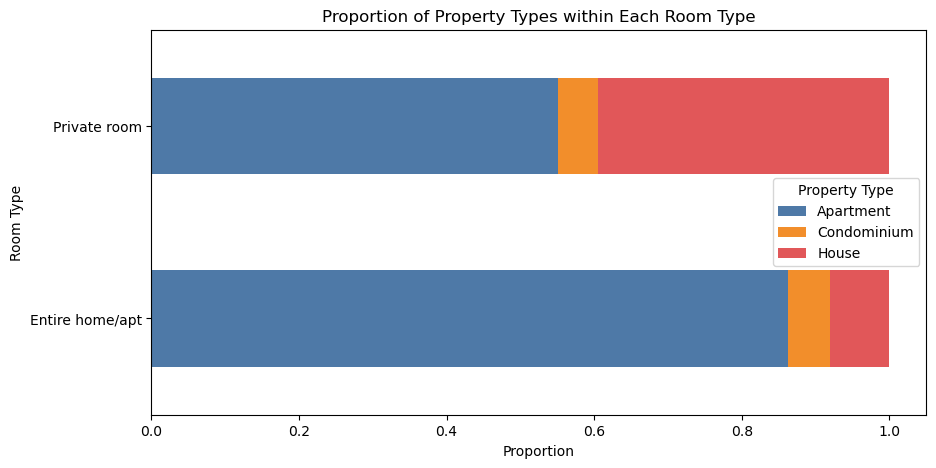

In [32]:
combination_counts = df_p3_v2.groupby(['room_type', 'property_type']).size().reset_index(name='counts')

# Pivot the data to get room types as index, property types as columns, and counts as values
pivot_table = combination_counts.pivot(index='room_type', columns='property_type', values='counts').fillna(0)

# Calculate proportions
pivot_proportions = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

# Colors for each property type
colors = ["#4e79a7", "#f28e2b", "#e15759"]

# Stacked bar plot
pivot_proportions.loc[['Entire home/apt', 'Private room']].plot(kind='barh', stacked=True, color=colors, ax=ax)

ax.set_xlabel('Proportion')
ax.set_ylabel('Room Type')
ax.set_title('Proportion of Property Types within Each Room Type')
ax.legend(title='Property Type')

plt.show()

Insights: 

- The ranking of property types within each room category remains consistent. Notably, a significantly larger proportion of houses are offered as private rooms rather than entire homes. This suggests a trend where hosts prefer to share parts of their houses with guests, in contrast to the approach taken with apartments and condominiums.

## Step 3: Summary

A summary of all the interesting finding in last sector's findings: 

- xx

- xx